<h1>Crescimento de regiões</h1>
<p>baseado no código apresentado pelo prof Msc. Aldísio Medeiros</p>

utiliza as bibliotecas numpy e opencv para a segmentação
com algumas modificações minimas

In [8]:
#bibliotecas
    
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import time



In [9]:
def growingRegionGray(x, y, differential):
    global image
    global image2
    global pixelsGrowing
    threshold = image[x][y]
    for u in pixelsGrowing:
        line = u[0]
        col = u[1]
        for a in range(kernelStep, kernelA + kernelStep):
            for b in range(kernelStep, kernelB + kernelStep):
                try:
                    if (threshold - differential <= image[line + a][col + b] <= threshold + differential):
                        if [line + a, col + b] in pixelsGrowing:
                            continue
                        else:
                            image2[line + a][col + b] = image[line + a][col + b]
                            image[line + a][col + b] = 1
                            pixelsGrowing.append([line + a, col + b])
                except:
                    continue
        #pixelsGrowing.remove(u)
        cv2.imshow('Result', image2)
        cv2.waitKey(1)


In [10]:

def growingRegionBin(x, y):
    global image
    global image2
    global pixelsGrowing

    for u in pixelsGrowing:
        line = u[0]
        col = u[1]
        for a in range(kernelStep,kernelA+kernelStep):
            for b in range(kernelStep,kernelB+kernelStep):
                try:
                    if (image[line+a][col+b] == 255):
                        if [line+a , col+b ] in pixelsGrowing:
                            continue
                        else:
                            image[line+a][col+b] = 1
                            pixelsGrowing.append([line+a , col+b ])
                            image2[line+a][col+b] = 255

                except:
                    continue
        cv2.imshow('Result', image2)
        cv2.waitKey(1)


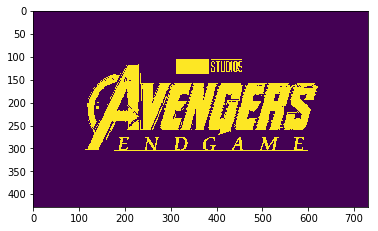

True

In [16]:

#AM: Read image
imgName = 'originais/avengers.png'
#imgName = 'originais/leucocitos.png'
#imgName = 'originais/coins.jpg'
image = cv2.imread(imgName, 0)
image2 = image
plt.imshow(image)
plt.show()
cv2.imwrite('original_cres.png',image)


In [17]:

startTime = time.time()
kernel = 3 #parâmetro de controle, impar
kernelSize = kernel*kernel
kernelA = int(math.sqrt(kernelSize))
kernelB = int(kernelA)
kernelStep = -1*int(kernelA/2)
pixelsGrowing = []

imageSizeX, imageSizeY = image.shape

# AM: Set seeds Bin
i=166; j=224
#pixelsGrowing.append([i, j]) #AM: seed
#pixelsGrowing.append([288, 191]) #AM: seed

# AM: Set seeds Gray
i=171; j=183
pixelsGrowing.append([i, j]) #AM: seed
pixelsGrowing.append([161,374]) #AM: seed
pixelsGrowing.append([85,220]) #AM: seed
pixelsGrowing.append([101,303]) #AM: seed
pixelsGrowing.append([251,77]) #AM: seed

# AM: Blank image
image2 = np.zeros((imageSizeX,imageSizeY,1), np.uint8)
image =  cv2.imread(imgName, 0)

# AM: Stat growing region
growingRegionBin(i,j)
#growingRegionGray(i, j, 25)

lapseTime = time.time() - startTime
print('Time lapse '+str(lapseTime)+'s')

cv2.imshow('image', image2)
cv2.imwrite('crescimento.png',image2)

cv2.waitKey(0)

Time lapse 21.094653606414795s


-1